In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
df = pd.read_csv('Indian Liver Patients Dataset.csv')

In [109]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [110]:
df=df.rename(columns={'Dataset':'Disease'})
df['Disease']=df['Disease'].replace(2,0)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Disease                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 47.9+ KB


In [112]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [113]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Disease                       0
dtype: int64

In [114]:
a=df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(a)
df['Disease'].value_counts()

1    416
0    167
Name: Disease, dtype: int64

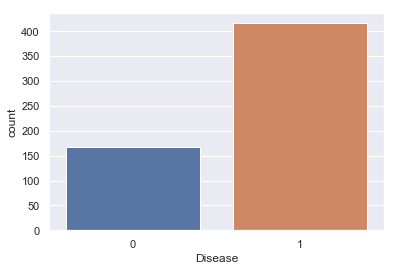

In [115]:
sns.countplot(x='Disease',data=df)

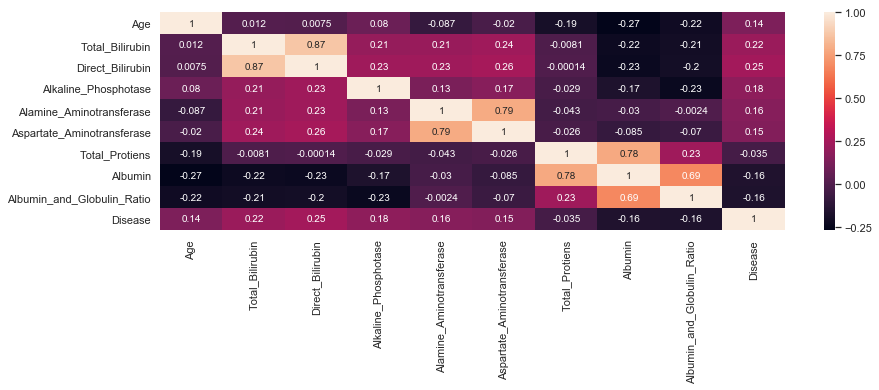

In [116]:
plt.figure(figsize=(14,4))
sns.heatmap(df.corr(),annot=True)

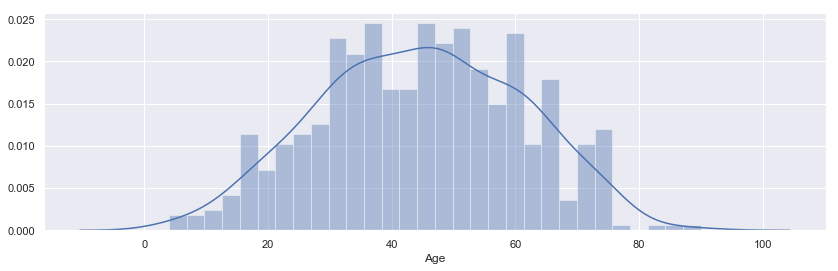

In [117]:
sns.set()
plt.figure(figsize=(14,4))
sns.distplot(a=df['Age'],bins=30)

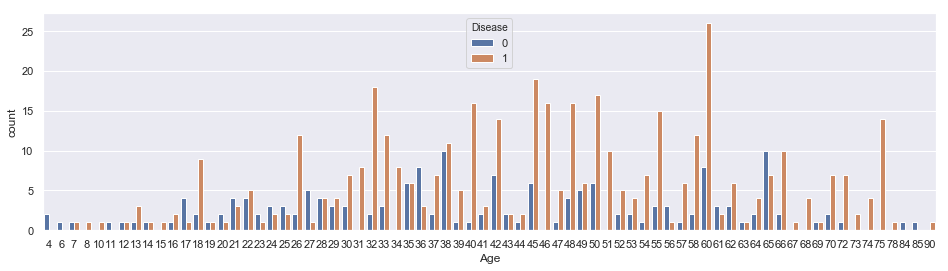

In [118]:
plt.figure(figsize=(16,4))
sns.countplot(x='Age',data=df,hue='Disease')

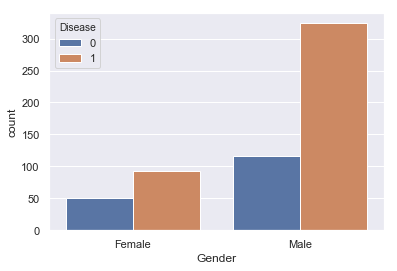

In [119]:
sns.countplot(x='Gender',data=df,hue='Disease')

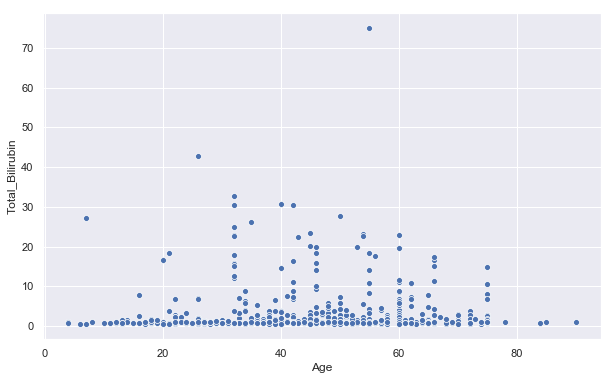

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Total_Bilirubin',data=df)

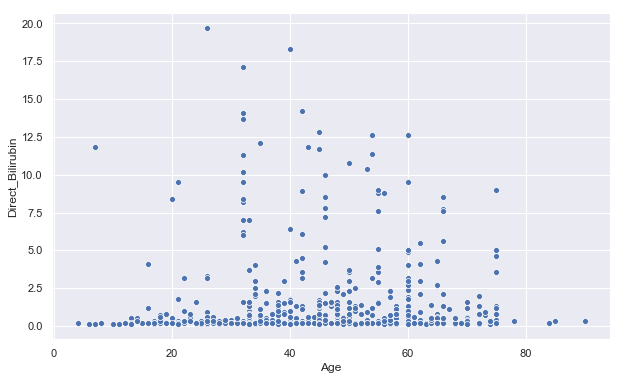

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Direct_Bilirubin',data=df)

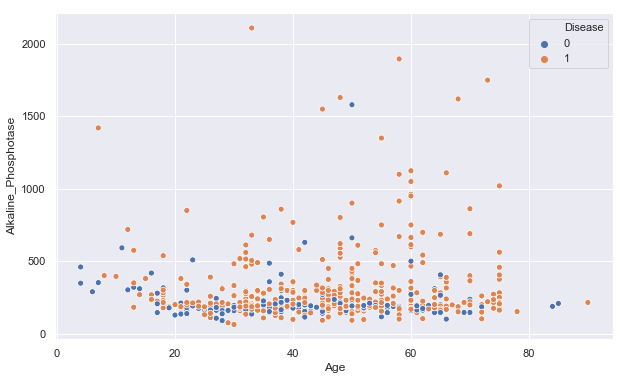

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Alkaline_Phosphotase',data=df,hue='Disease')

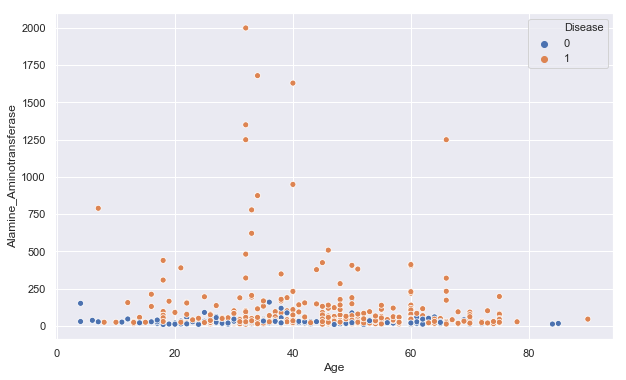

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Alamine_Aminotransferase',data=df,hue='Disease')

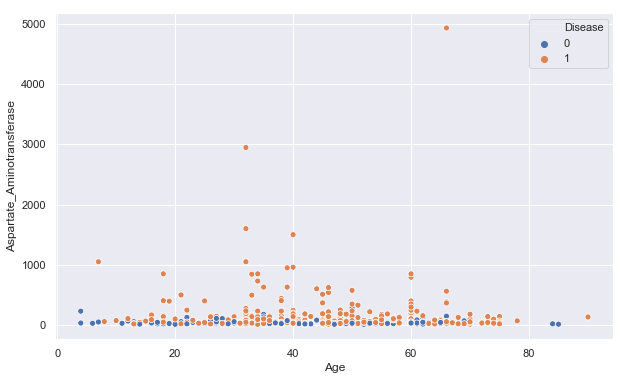

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Aspartate_Aminotransferase',data=df,hue='Disease')

In [125]:
df.loc[(df['Direct_Bilirubin']<0.5),'DBLevel'] = 'Normal'
df.loc[(df['Direct_Bilirubin']>=0.5),'DBLevel'] = 'High'

In [126]:
df.loc[(df['Total_Bilirubin']<=1.2),'TBLevel'] = 'Normal'
df.loc[(df['Total_Bilirubin']>1.2),'TBLevel'] = 'High'

In [127]:
df.loc[(df['Alkaline_Phosphotase']<20),'APLevel'] = 'Low'
df.loc[(df['Alkaline_Phosphotase']>=20)&(df['Alkaline_Phosphotase']<=140),'APLevel'] = 'Normal'
df.loc[(df['Alkaline_Phosphotase']>140),'APLevel'] = 'High'

In [128]:
df.loc[(df['Alamine_Aminotransferase']<20),'AALevel'] = 'Low'
df.loc[(df['Alamine_Aminotransferase']>=20)&(df['Alkaline_Phosphotase']<=60),'AALevel'] = 'Normal'
df.loc[(df['Alamine_Aminotransferase']>60),'AALevel'] = 'High'

In [129]:
df.loc[(df['Aspartate_Aminotransferase']<5),'AALevel'] = 'Low'
df.loc[(df['Aspartate_Aminotransferase']>=5)&(df['Alkaline_Phosphotase']<=40),'AALevel'] = 'Normal'
df.loc[(df['Aspartate_Aminotransferase']>40),'AALevel'] = 'High'

In [130]:
'''
df.loc[(df['Total_Protiens']<6),'TPLevel'] = 'Low'
df.loc[(df['Total_Protiens']>=6)&(df['Total_Protiens']<=8),'TPLevel'] = 'Normal'
df.loc[(df['Total_Protiens']>=8),'TPLevel'] = 'High'
'''

"\ndf.loc[(df['Total_Protiens']<6),'TPLevel'] = 'Low'\ndf.loc[(df['Total_Protiens']>=6)&(df['Total_Protiens']<=8),'TPLevel'] = 'Normal'\ndf.loc[(df['Total_Protiens']>=8),'TPLevel'] = 'High'\n"

In [131]:
columns=df[['Gender','DBLevel','TBLevel','APLevel','AALevel']]
df1=pd.get_dummies(df,columns=columns)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns_scale=['Age','Alkaline_Phosphotase','Total_Bilirubin','Direct_Bilirubin','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin',
              'Total_Protiens','Albumin_and_Globulin_Ratio']
df1[columns_scale]=scaler.fit_transform(df1[columns_scale])

In [132]:
y = df1['Disease']
X = df1.drop(['Disease'], axis = 1)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

             precision    recall  f1-score   support

          0       0.40      0.40      0.40        30
          1       0.79      0.79      0.79        87

avg / total       0.69      0.69      0.69       117

[[12 18]
 [18 69]]
0.6923076923076923


In [135]:
error_rate=[]
for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean((y_test != pred)))

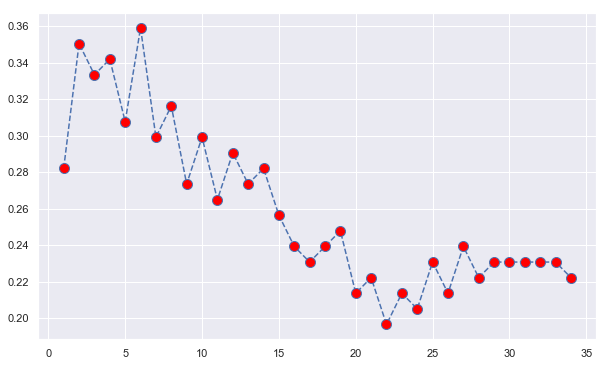

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate, color = 'b',linestyle = '--',marker ='o',markerfacecolor='red',markersize = 10 )

In [137]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

             precision    recall  f1-score   support

          0       0.69      0.30      0.42        30
          1       0.80      0.95      0.87        87

avg / total       0.77      0.79      0.75       117

[[ 9 21]
 [ 4 83]]
0.7863247863247863


In [138]:
columns=df[['Gender','DBLevel','TBLevel','APLevel','AALevel']]
df=pd.get_dummies(df,columns=columns)
y = df['Disease']
X = df.drop(['Disease'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.56      0.50      0.53        30
          1       0.83      0.86      0.85        87

avg / total       0.76      0.77      0.77       117

[[15 15]
 [12 75]]
0.7692307692307693
